In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [4]:
df = pd.read_csv('Train.csv')
print(df)

          ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5         

In [5]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
df['Reached.on.Time_Y.N'].value_counts()


Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [11]:
df.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean()


Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

In [34]:
print("\nOn-Time Delivery by Shipment Mode")
print(df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].sum())



On-Time Delivery by Shipment Mode
Mode_of_Shipment
Flight    1069
Road      1035
Ship      4459
Name: Reached.on.Time_Y.N, dtype: int64


In [35]:
print("Average Cost per Warehouse")
print(df.groupby('Warehouse_block')['Cost_of_the_Product'].mean())

Average Cost per Warehouse
Warehouse_block
A    208.767594
B    212.159302
C    211.191489
D    210.907852
F    209.077196
Name: Cost_of_the_Product, dtype: float64


In [12]:
df.groupby('Warehouse_block')['ID'].count()


Warehouse_block
A    1833
B    1833
C    1833
D    1834
F    3666
Name: ID, dtype: int64

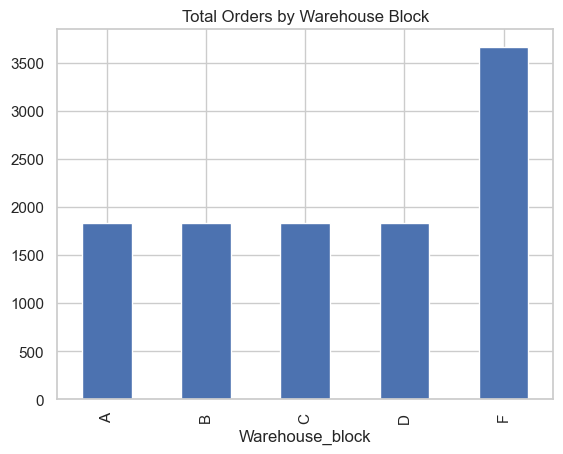

In [13]:
df.groupby('Warehouse_block')['ID'].count().plot(kind='bar')
plt.title("Total Orders by Warehouse Block")
plt.show()


In [14]:
df.groupby('Reached.on.Time_Y.N').mean(numeric_only=True)


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,,,
0,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395
1,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104


In [15]:
pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])


Reached.on.Time_Y.N,0,1
Mode_of_Shipment,,
Flight,708,1069
Road,725,1035
Ship,3003,4459


In [16]:
df.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean()


Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

In [17]:
df.groupby('Mode_of_Shipment')['Weight_in_gms'].mean()


Mode_of_Shipment
Flight    3629.378165
Road      3649.550568
Ship      3631.457518
Name: Weight_in_gms, dtype: float64

In [18]:
df.groupby('Reached.on.Time_Y.N')['Discount_offered'].agg(['mean','sum','min','max'])


,mean,sum,min,max
Reached.on.Time_Y.N,,,,
0,5.545987,24602,1,10
1,18.663721,122490,1,65


In [22]:
result = df.groupby('Product_importance')['Reached.on.Time_Y.N'].value_counts(normalize=True) * 100
result.round(2).astype(str) + '%'


Product_importance  Reached.on.Time_Y.N
high                1                      64.98%
                    0                      35.02%
low                 1                      59.28%
                    0                      40.72%
medium              1                      59.05%
                    0                      40.95%
Name: proportion, dtype: object

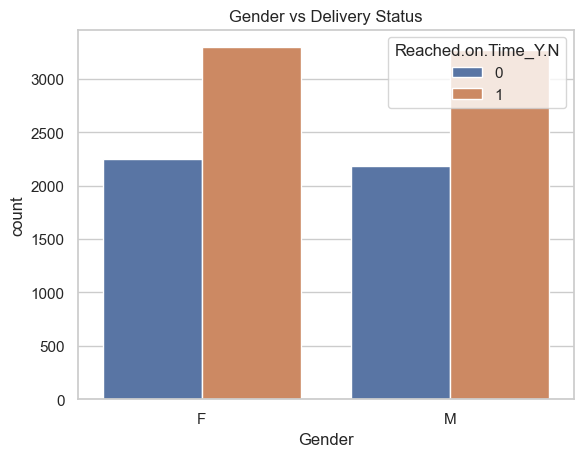

In [23]:
sns.countplot(x='Gender',
              hue='Reached.on.Time_Y.N',
              data=df)

plt.title("Gender vs Delivery Status")
plt.show()


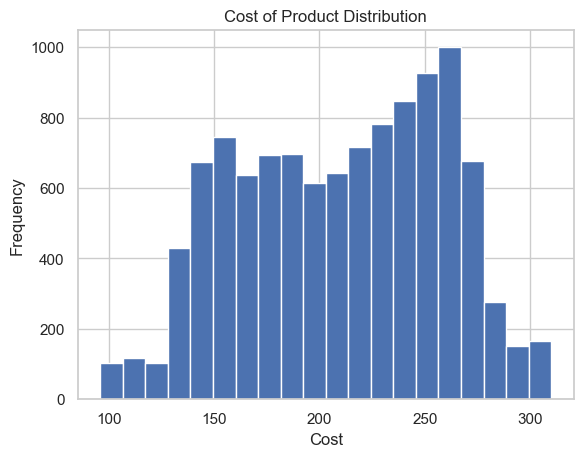

In [24]:

df["Cost_of_the_Product"].plot(kind='hist', bins=20)
plt.title("Cost of Product Distribution")
plt.xlabel("Cost")
plt.show()



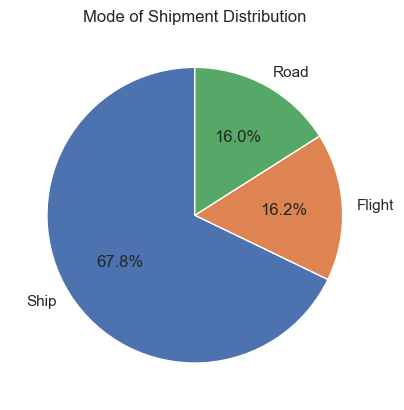

In [27]:
df["Mode_of_Shipment"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Mode of Shipment Distribution")
plt.ylabel("")
plt.show()


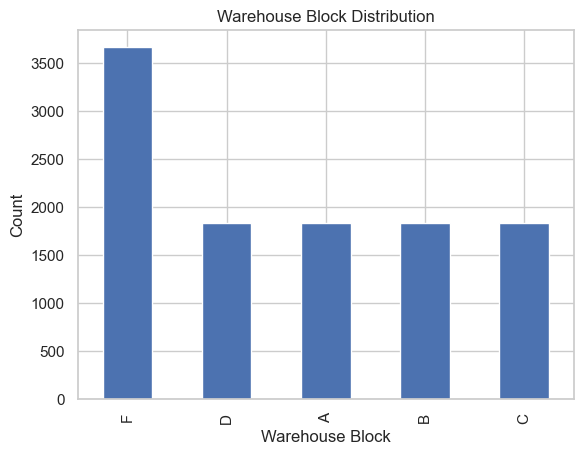

In [29]:
df["Warehouse_block"].value_counts().plot(kind='bar')

plt.title("Warehouse Block Distribution")
plt.xlabel("Warehouse Block")
plt.ylabel("Count")
plt.show()


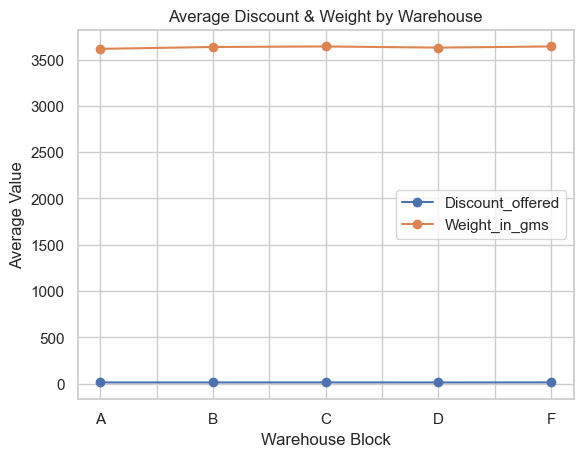

In [30]:
summary = df.groupby('Warehouse_block')[['Discount_offered', 'Weight_in_gms']].mean()

summary.plot(marker='o')

plt.title("Average Discount & Weight by Warehouse")
plt.xlabel("Warehouse Block")
plt.ylabel("Average Value")
plt.show()


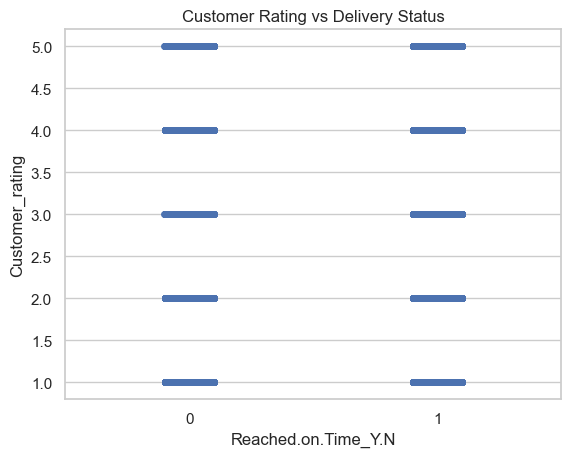

In [31]:
sns.stripplot(x='Reached.on.Time_Y.N',
              y='Customer_rating',
              data=df,
              jitter=True)

plt.title("Customer Rating vs Delivery Status")
plt.show()


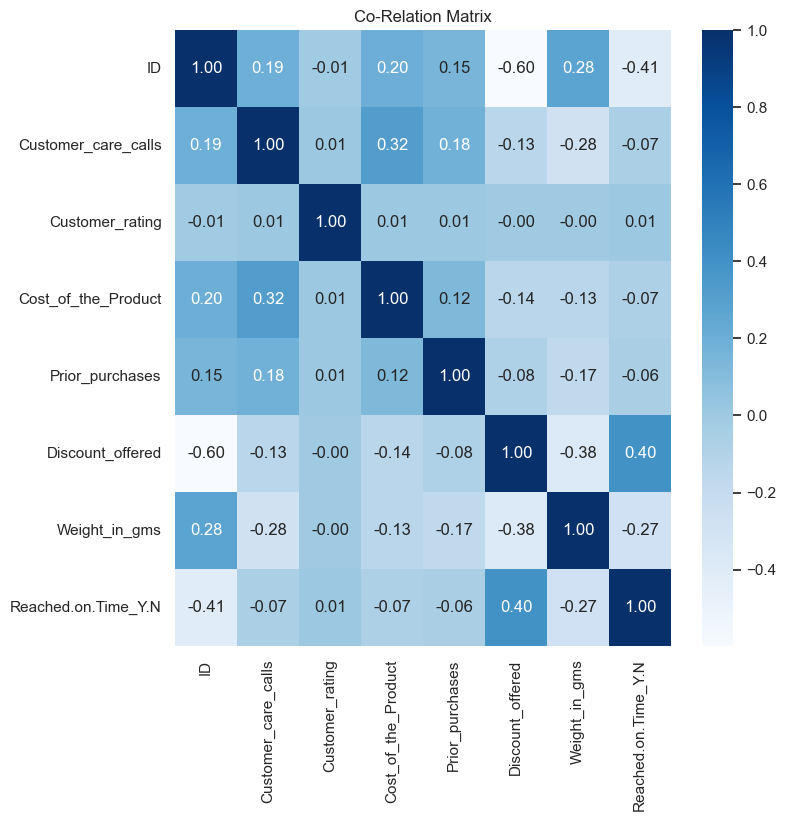

In [36]:
plt.figure(figsize=(8,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot = True, cmap = 'Blues',fmt = '.2f')
plt.title("Co-Relation Matrix")
plt.show()